# Time Series Functionalities

In [1]:
import pandas as pd

## Working with dates

In [2]:
# transform a string to datetime
pd.to_datetime('2016-06-10 1:25pm')

Timestamp('2016-06-10 13:25:00')

In [3]:
# Pandas will try to infer the date, better practice is to pass the format.
pd.to_datetime('5-11-2000')  # It will assume 5 is the day

Timestamp('2000-05-11 00:00:00')

In [4]:
# By passing the format we can ensure that the conversion is done correctly
pd.to_datetime('5-11-2000', format='%d-%m-%Y') 

Timestamp('2000-11-05 00:00:00')

In [5]:
# Date Range
date_rng = pd.date_range(start='1-1-2020', end='12-31-2021', freq='D')
date_rng

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

## Slicing

In [6]:
# sample ts 
import numpy as np

df = pd.DataFrame(np.random.normal(size=(len(date_rng))), columns=['data'], index=date_rng)

df.head()

,data
2020-01-01,-1.215401
2020-01-02,-1.350486
2020-01-03,-0.647812
2020-01-04,-2.198503
2020-01-05,1.114052


In [7]:
# numerical slicing
df.iloc[0:10]

,data
2020-01-01,-1.215401
2020-01-02,-1.350486
2020-01-03,-0.647812
2020-01-04,-2.198503
2020-01-05,1.114052
2020-01-06,0.183102
2020-01-07,-0.001138
2020-01-08,-2.626637
2020-01-09,-2.634706
2020-01-10,0.452511


<div class="alert alert-block alert-info">
<b>Info:</b> Dates and strings that parse to timestamps can be passed as indexing parameters</div>

In [8]:
# label slicing
df.loc[pd.to_datetime('2020-01-01'):pd.to_datetime('2020-01-10')]

# also strings can be used
df.loc['2020-01-01':'2020-01-10']

,data
2020-01-01,-1.215401
2020-01-02,-1.350486
2020-01-03,-0.647812
2020-01-04,-2.198503
2020-01-05,1.114052
2020-01-06,0.183102
2020-01-07,-0.001138
2020-01-08,-2.626637
2020-01-09,-2.634706
2020-01-10,0.452511


In [9]:
# Partial strings e.g. for year 2020
df.loc['2020']

,data
2020-01-01,-1.215401
2020-01-02,-1.350486
2020-01-03,-0.647812
2020-01-04,-2.198503
2020-01-05,1.114052
...,...
2020-12-27,-1.437629
2020-12-28,-0.036903
2020-12-29,1.415596
2020-12-30,0.596543


## Resampling

In [11]:
# 3 days
df.resample("3d").mean().head()

,data
2020-01-01,-1.071233
2020-01-04,-0.300450
2020-01-07,-1.754160
2020-01-10,0.682096
2020-01-13,-0.408920


In [12]:
# weekly
df.resample("W").mean().head()

,data
2020-01-05,-0.859630
2020-01-12,-0.433299
2020-01-19,-0.374187
2020-01-26,0.003041
2020-02-02,0.141634


In [14]:
# monthly
df.resample("M").mean().head()

,data
2020-01-31,-0.296664
2020-02-29,-0.284684
2020-03-31,-0.366089
2020-04-30,0.165135
2020-05-31,-0.078693


<div class="alert alert-block alert-info">
<b>Info:</b> More complex aggregations can be done with resampling </div>

In [15]:
df.resample("W").agg(['max', 'min', 'sum']).head()

data                    
                 max       min       sum
2020-01-05  1.114052 -2.198503 -4.298150
2020-01-12  1.153179 -2.634706 -3.033090
2020-01-19  0.921302 -1.955068 -2.619306
2020-01-26  1.536999 -1.618617  0.021286
2020-02-02  1.433139 -0.621311  0.991438

## Rolling, expanding and ewm

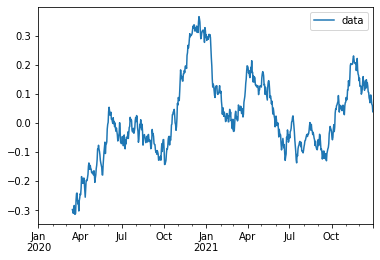

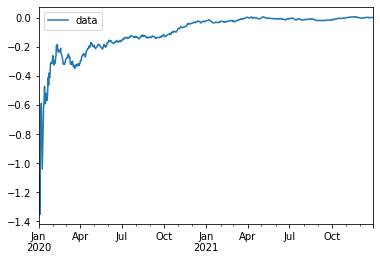

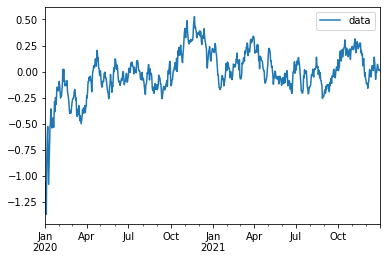

In [20]:
import matplotlib.pyplot as plt
df.rolling(75).mean().plot()
df.expanding().mean().plot()
df.ewm(alpha=0.05).mean().plot()
